In [4]:
import numpy as np
import tangos as db
import pickle as pck
import pynbody
import matplotlib.pyplot as plt
import scipy.integrate as integ
import math as ma
plt.ion()

plt.rcParams['figure.figsize'] = (12, 9) 
plt.rcParams['font.size'] = 20  
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['xtick.major.size'] = 10 
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

sim = db.get_simulation('h1.cosmo50')

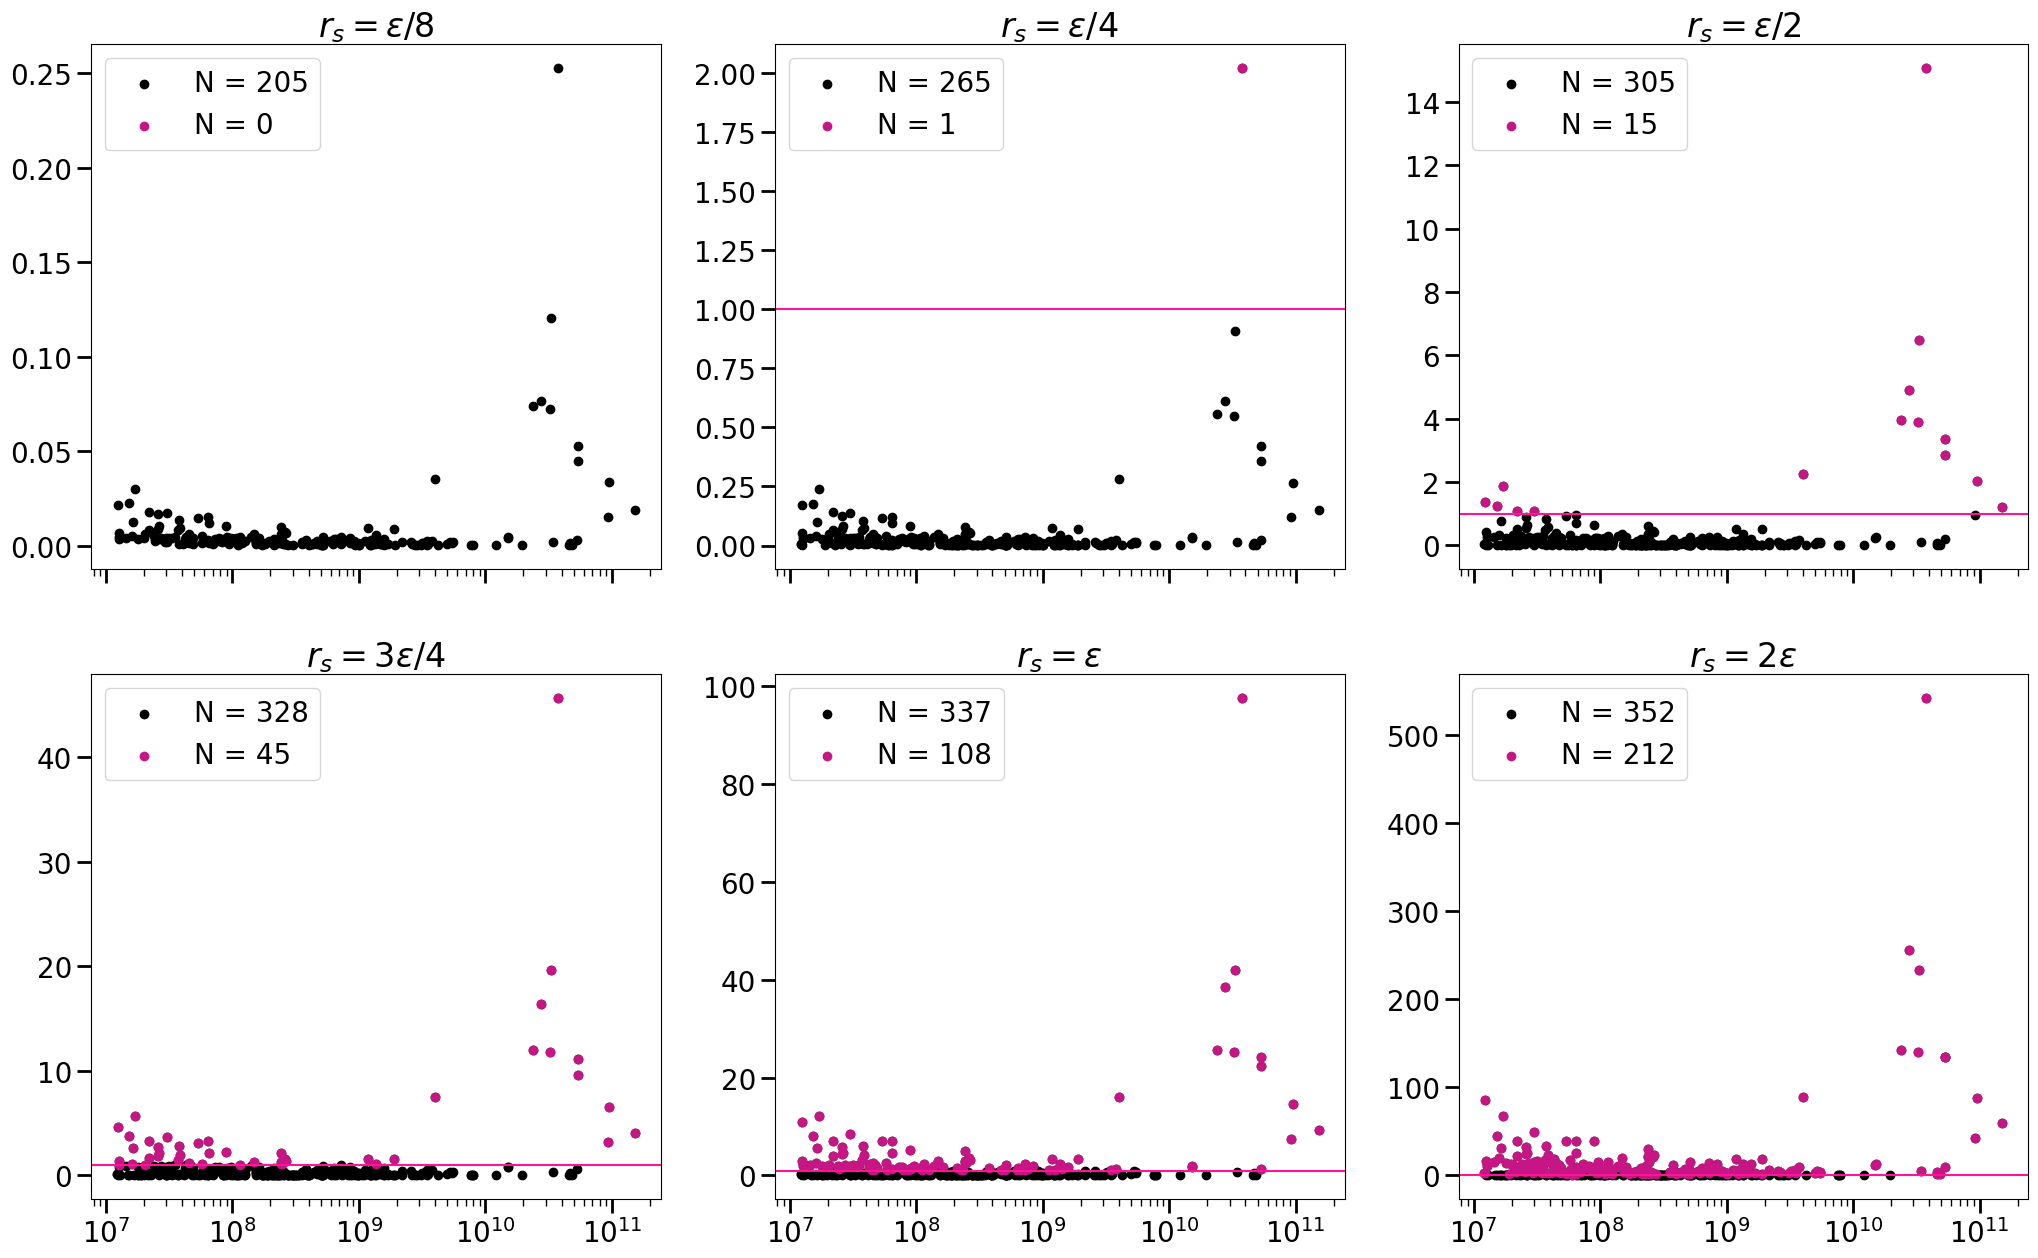

In [15]:
f = open('UCD_rs0.pkl','rb')
data = pck.load(f)
f.close()
mass = np.array(data['mass'])
host_m = np.array(data['host_mass'])
host_at = np.array(data['host_at'])

f = open('UCD_rs1.pkl','rb')
data1 = pck.load(f)
f.close()
mass1 = np.array(data1['mass'])
host_m1 = np.array(data1['host_mass'])
host_at1 = np.array(data1['host_at'])

f = open('UCD_rs2.pkl','rb')
data2 = pck.load(f)
f.close()
mass2 = np.array(data2['mass'])
host_m2 = np.array(data2['host_mass'])
host_at2 = np.array(data2['host_at'])

f = open('UCD_rs3.pkl','rb')
data3 = pck.load(f)
f.close()
mass3 = np.array(data3['mass'])
host_m3 = np.array(data3['host_mass'])
host_at3 = np.array(data3['host_at'])

f = open('UCD_rs4.pkl','rb')
data4 = pck.load(f)
f.close()
mass4 = np.array(data4['mass'])
host_m4 = np.array(data4['host_mass'])
host_at4 = np.array(data4['host_at'])

f = open('UCD_rs5.pkl','rb')
data5 = pck.load(f)
f.close()
mass5 = np.array(data5['mass'])
host_m5 = np.array(data5['host_mass'])
host_at5 = np.array(data5['host_at'])

fig, (ax) = plt.subplots(2,3,figsize=(25,15),sharex='all')
plt.xscale('log')
ax[0,1].axhline(y=1,c = 'deeppink')
ax[0,2].axhline(y=1,c = 'deeppink')
ax[1,0].axhline(y=1,c = 'deeppink')
ax[1,1].axhline(y=1,c = 'deeppink')
ax[1,2].axhline(y=1,c = 'deeppink')
ax[0,0].scatter(host_m,mass/host_at,c='k',label='N = '+str(len(host_m)))
ax[0,1].scatter(host_m1,mass1/host_at1,c='k',label='N = '+str(len(host_m1)))
ax[0,2].scatter(host_m2,mass2/host_at2,c='k',label='N = '+str(len(host_m2)))
ax[1,0].scatter(host_m3,mass3/host_at3,c='k',label='N = '+str(len(host_m3)))
ax[1,1].scatter(host_m4,mass4/host_at4,c='k',label='N = '+str(len(host_m4)))
ax[1,2].scatter(host_m5,mass5/host_at5,c='k',label='N = '+str(len(host_m5)))
bad = np.where((mass/host_at)>1)
bad1 = np.where((mass1/host_at1)>1)
bad2 = np.where((mass2/host_at2)>1)
bad3 = np.where((mass3/host_at3)>1)
bad4 = np.where((mass4/host_at4)>1)
bad5 = np.where((mass5/host_at5)>1)
ax[0,0].scatter(host_m[bad],mass[bad]/host_at[bad],c='mediumvioletred',label='N = '+str(len(host_m[bad])))
ax[0,1].scatter(host_m1[bad1],mass1[bad1]/host_at1[bad1],c='mediumvioletred',label='N = '+str(len(host_m1[bad1])))
ax[0,2].scatter(host_m2[bad2],mass2[bad2]/host_at2[bad2],c='mediumvioletred',label='N = '+str(len(host_m2[bad2])))
ax[1,0].scatter(host_m3[bad3],mass3[bad3]/host_at3[bad3],c='mediumvioletred',label='N = '+str(len(host_m3[bad3])))
ax[1,1].scatter(host_m4[bad4],mass4[bad4]/host_at4[bad4],c='mediumvioletred',label='N = '+str(len(host_m4[bad4])))
ax[1,2].scatter(host_m5[bad5],mass5[bad5]/host_at5[bad5],c='mediumvioletred',label='N = '+str(len(host_m5[bad5])))
ax[0,0].set_title('$r_s = \epsilon/8$')
ax[0,1].set_title('$r_s = \epsilon/4$')
ax[0,2].set_title('$r_s = \epsilon/2$')
ax[1,0].set_title('$r_s = 3\epsilon/4$')
ax[1,1].set_title('$r_s = \epsilon$')
ax[1,2].set_title('$r_s = 2\epsilon$')
ax[0,0].legend(loc='upper left')
ax[0,1].legend(loc='upper left')
ax[0,2].legend(loc='upper left')
ax[1,0].legend(loc='upper left')
ax[1,1].legend(loc='upper left')
ax[1,2].legend(loc='upper left')

In [17]:
print('r_s = epsilon/8',len(np.where(mass<100000)[0]))
print('r_s = epsilon/4',len(np.where(mass1<100000)[0]))
print('r_s = epsilon/2',len(np.where(mass2<100000)[0]))
print('r_s = 3epsilon/4',len(np.where(mass3<100000)[0]))
print('r_s = epsilon/',len(np.where(mass4<100000)[0]))
print('r_s = epsilon/8',len(np.where(mass5<100000)[0]))

r_s = epsilon/8 104
r_s = epsilon/4 67
r_s = epsilon/2 43
r_s = 3epsilon/4 45
r_s = epsilon/ 36
r_s = epsilon/8 22


In [5]:
def original_host_mass_at(radius,ori_host,step):
    short_step = int(step.split('.')[-1])
    original_halo_num = int(ori_host.split('_')[-1])
    short_step = str(short_step)
    if len(short_step)!=4:
        short_step = str(0)+str(short_step)
        if len(short_step)!=3:
            short_step = str(0)+str(short_step)
        
    host= db.get_halo('h1.cosmo50/%'+str(short_step)+'/'+str(original_halo_num))
    host_at = host.calculate('at('+str(radius)+',star_mass_profile)')
    return host_at

In [6]:
e = 0.35
rs = [0.125*e,0.25*e,0.5*e,0.75*e,e,2*e]

for j in range(len(rs)):
    
    f = open('Extrapolation_Outputs.pkl','rb')
    data = pck.load(f)
    f.close()  
    
    step=data['step']
    host=data['host']
    
    host_at = []
    
    for i in range(len(index)):
        host_at.append(original_host_mass_at(1.4,host[i],step[i]))
        
    f = open('check'+str(rs[j])+'.pkl','rb')
    data1 = pck.load(f)
    f.close()

    time = data1['time']
    mass = data1['mass']
    bh_mass=data1['bh_mass']
    infall = np.array(data1['infall'])

    f = open('Extrapolation_Outputs.pkl','rb')
    old_data = pck.load(f)
    f.close()

    ids = np.array(old_data['bhid'])
    dist = np.array(old_data['dist'])
    host_mass = np.array(old_data['hostmass'])
    index=np.array(old_data['index'])
    a=np.array(old_data['a'])
    b=np.array(old_data['b'])
    step=np.array(old_data['step'])
    host=np.array(old_data['host'])

    f = open('UCD_proxy.pkl','rb')
    vold_data = pck.load(f)
    f.close()

    UCD_proxy = np.array(vold_data['mass'])

    UCD_index = []
    UCD_bh_mass = []
    UCD_mass=[]
    other_index=[]

    for i in range(len(time)):
        if mass[i][0]>100000:
            other_index.append(index[i]) 
            UCD_index.append(i)
    print(len(mass))
    print(len(UCD_index))
    for i in range(len(other_index)):
        UCD_mass.append(mass[UCD_index[i]][0])
        UCD_bh_mass.append(bh_mass[UCD_index[i]][0])
    
    UCD_host_mass = host_mass[UCD_index]
    UCD_dist = dist[UCD_index]
    infall = infall[UCD_index]
    UCD_proxy = UCD_proxy[UCD_index]
    UCD_ids = ids[UCD_index]
    UCD_a = a[UCD_index]
    UCD_b = b[UCD_index]
    UCD_step = step[UCD_index]
    UCD_host = host[UCD_index]
    host_at = np.array(host_at)
    Host_at = host_at[UCD_index]

    data_to_file={'host_at':Host_at,'a':UCD_a,'b':UCD_b,'step':UCD_step,'host':UCD_host,'ids':UCD_ids,'index':other_index,'bh_mass':UCD_bh_mass,'mass':UCD_mass,'host_mass':UCD_host_mass,'dist':UCD_dist,'infall':infall,'proxy':UCD_proxy}
    f = open('UCD_initial_rs'+str(j)+'.pkl','wb')
    pck.dump(data_to_file,f)
    f.close()
    
    print(j)

424
244
0
424
408
1
424
424
2
424
424
3
424
424
4
424
424
5


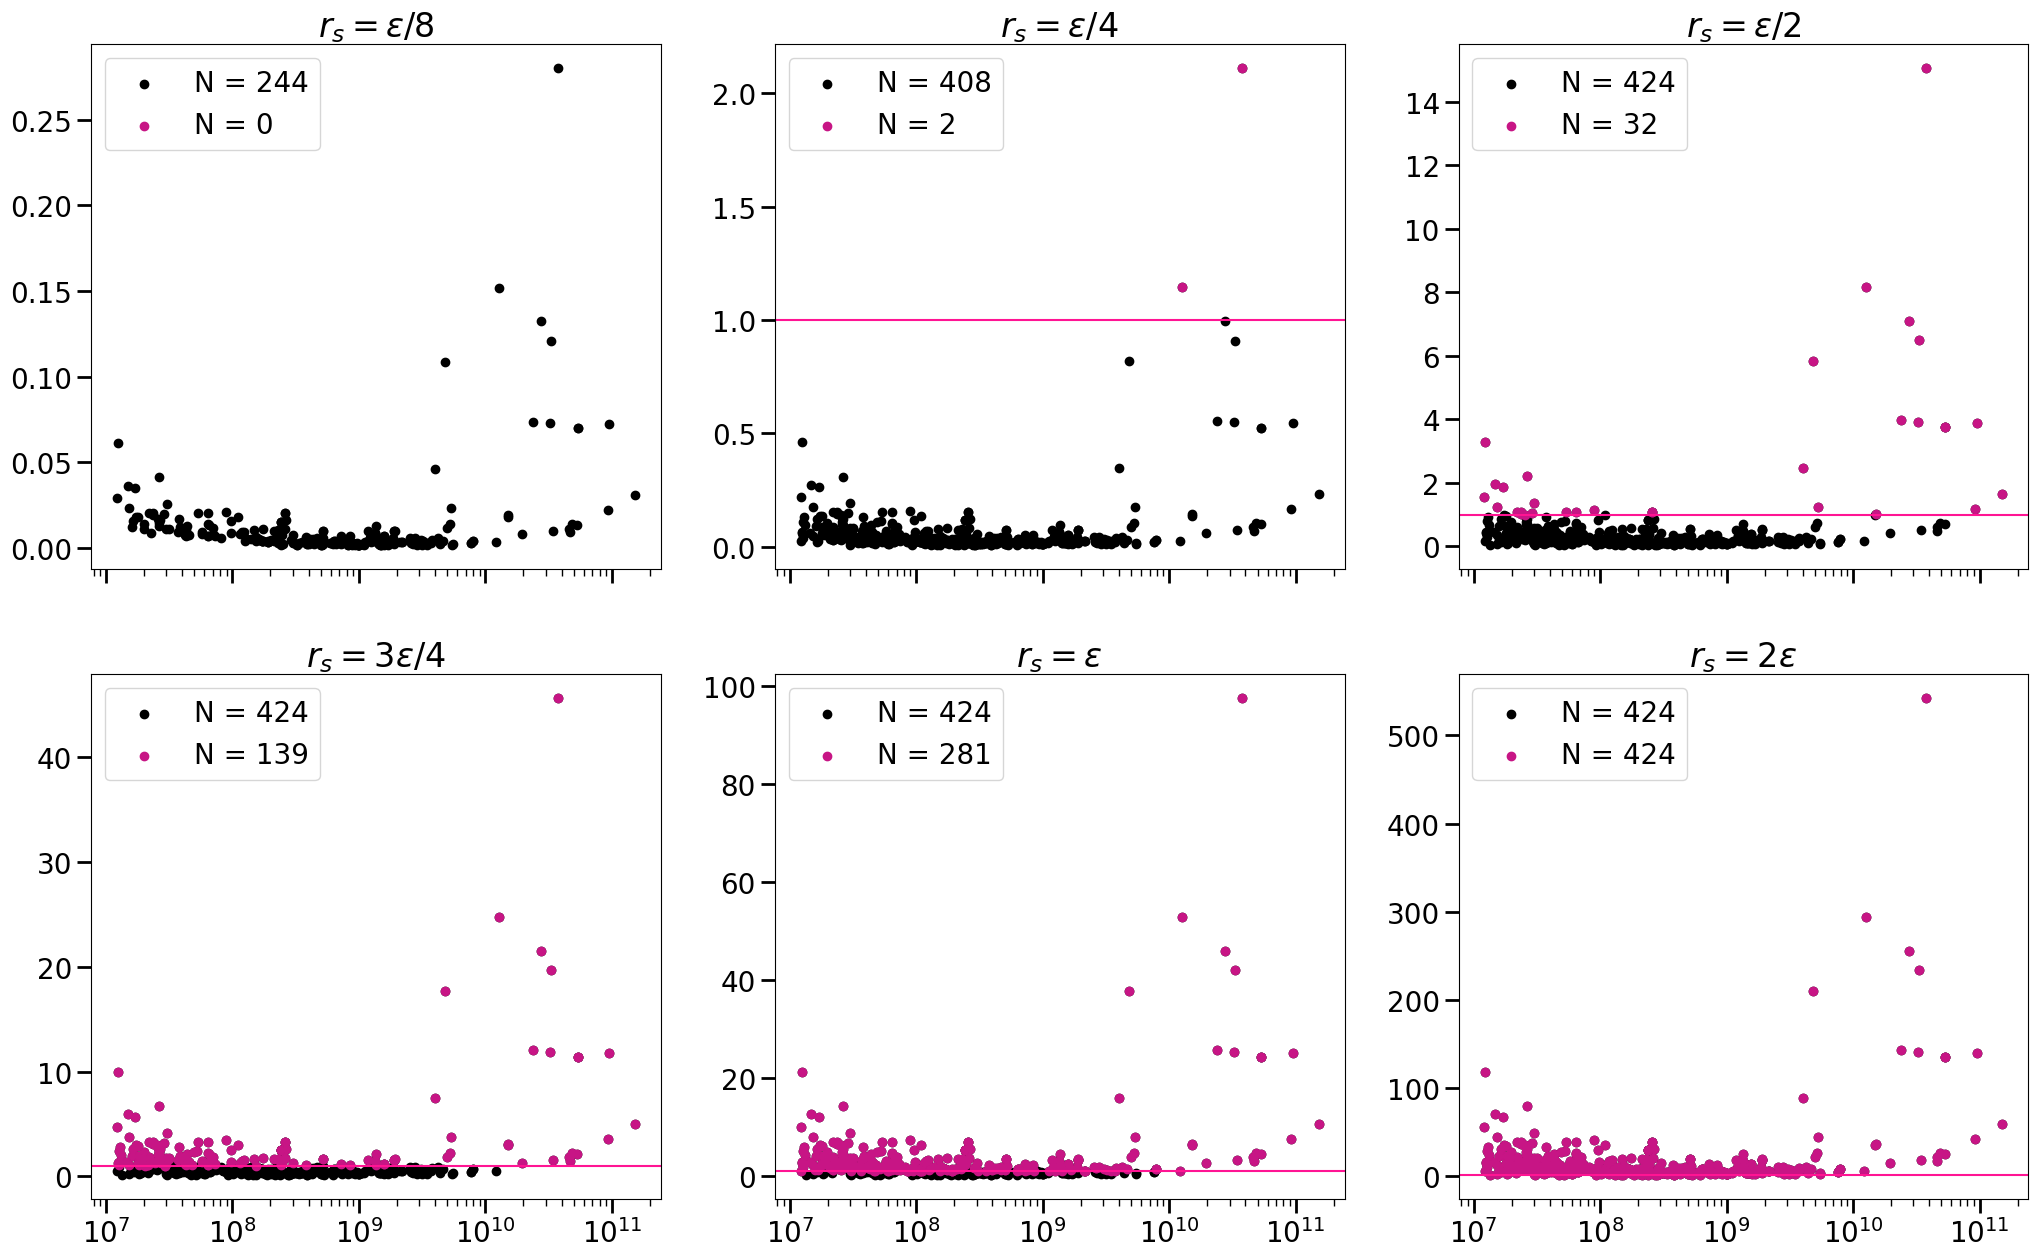

In [7]:
f = open('UCD_initial_rs0.pkl','rb')
data = pck.load(f)
f.close()
mass = np.array(data['mass'])
host_m = np.array(data['host_mass'])
host_at = np.array(data['host_at'])

f = open('UCD_initial_rs1.pkl','rb')
data1 = pck.load(f)
f.close()
mass1 = np.array(data1['mass'])
host_m1 = np.array(data1['host_mass'])
host_at1 = np.array(data1['host_at'])

f = open('UCD_initial_rs2.pkl','rb')
data2 = pck.load(f)
f.close()
mass2 = np.array(data2['mass'])
host_m2 = np.array(data2['host_mass'])
host_at2 = np.array(data2['host_at'])

f = open('UCD_initial_rs3.pkl','rb')
data3 = pck.load(f)
f.close()
mass3 = np.array(data3['mass'])
host_m3 = np.array(data3['host_mass'])
host_at3 = np.array(data3['host_at'])

f = open('UCD_initial_rs4.pkl','rb')
data4 = pck.load(f)
f.close()
mass4 = np.array(data4['mass'])
host_m4 = np.array(data4['host_mass'])
host_at4 = np.array(data4['host_at'])

f = open('UCD_initial_rs5.pkl','rb')
data5 = pck.load(f)
f.close()
mass5 = np.array(data5['mass'])
host_m5 = np.array(data5['host_mass'])
host_at5 = np.array(data5['host_at'])

fig, (ax) = plt.subplots(2,3,figsize=(25,15),sharex='all')
plt.xscale('log')
ax[0,1].axhline(y=1,c = 'deeppink')
ax[0,2].axhline(y=1,c = 'deeppink')
ax[1,0].axhline(y=1,c = 'deeppink')
ax[1,1].axhline(y=1,c = 'deeppink')
ax[1,2].axhline(y=1,c = 'deeppink')
ax[0,0].scatter(host_m,mass/host_at,c='k',label='N = '+str(len(host_m)))
ax[0,1].scatter(host_m1,mass1/host_at1,c='k',label='N = '+str(len(host_m1)))
ax[0,2].scatter(host_m2,mass2/host_at2,c='k',label='N = '+str(len(host_m2)))
ax[1,0].scatter(host_m3,mass3/host_at3,c='k',label='N = '+str(len(host_m3)))
ax[1,1].scatter(host_m4,mass4/host_at4,c='k',label='N = '+str(len(host_m4)))
ax[1,2].scatter(host_m5,mass5/host_at5,c='k',label='N = '+str(len(host_m5)))
bad = np.where((mass/host_at)>1)
bad1 = np.where((mass1/host_at1)>1)
bad2 = np.where((mass2/host_at2)>1)
bad3 = np.where((mass3/host_at3)>1)
bad4 = np.where((mass4/host_at4)>1)
bad5 = np.where((mass5/host_at5)>1)
ax[0,0].scatter(host_m[bad],mass[bad]/host_at[bad],c='mediumvioletred',label='N = '+str(len(host_m[bad])))
ax[0,1].scatter(host_m1[bad1],mass1[bad1]/host_at1[bad1],c='mediumvioletred',label='N = '+str(len(host_m1[bad1])))
ax[0,2].scatter(host_m2[bad2],mass2[bad2]/host_at2[bad2],c='mediumvioletred',label='N = '+str(len(host_m2[bad2])))
ax[1,0].scatter(host_m3[bad3],mass3[bad3]/host_at3[bad3],c='mediumvioletred',label='N = '+str(len(host_m3[bad3])))
ax[1,1].scatter(host_m4[bad4],mass4[bad4]/host_at4[bad4],c='mediumvioletred',label='N = '+str(len(host_m4[bad4])))
ax[1,2].scatter(host_m5[bad5],mass5[bad5]/host_at5[bad5],c='mediumvioletred',label='N = '+str(len(host_m5[bad5])))
ax[0,0].set_title('$r_s = \epsilon/8$')
ax[0,1].set_title('$r_s = \epsilon/4$')
ax[0,2].set_title('$r_s = \epsilon/2$')
ax[1,0].set_title('$r_s = 3\epsilon/4$')
ax[1,1].set_title('$r_s = \epsilon$')
ax[1,2].set_title('$r_s = 2\epsilon$')
ax[0,0].legend(loc='upper left')
ax[0,1].legend(loc='upper left')
ax[0,2].legend(loc='upper left')
ax[1,0].legend(loc='upper left')
ax[1,1].legend(loc='upper left')
ax[1,2].legend(loc='upper left')

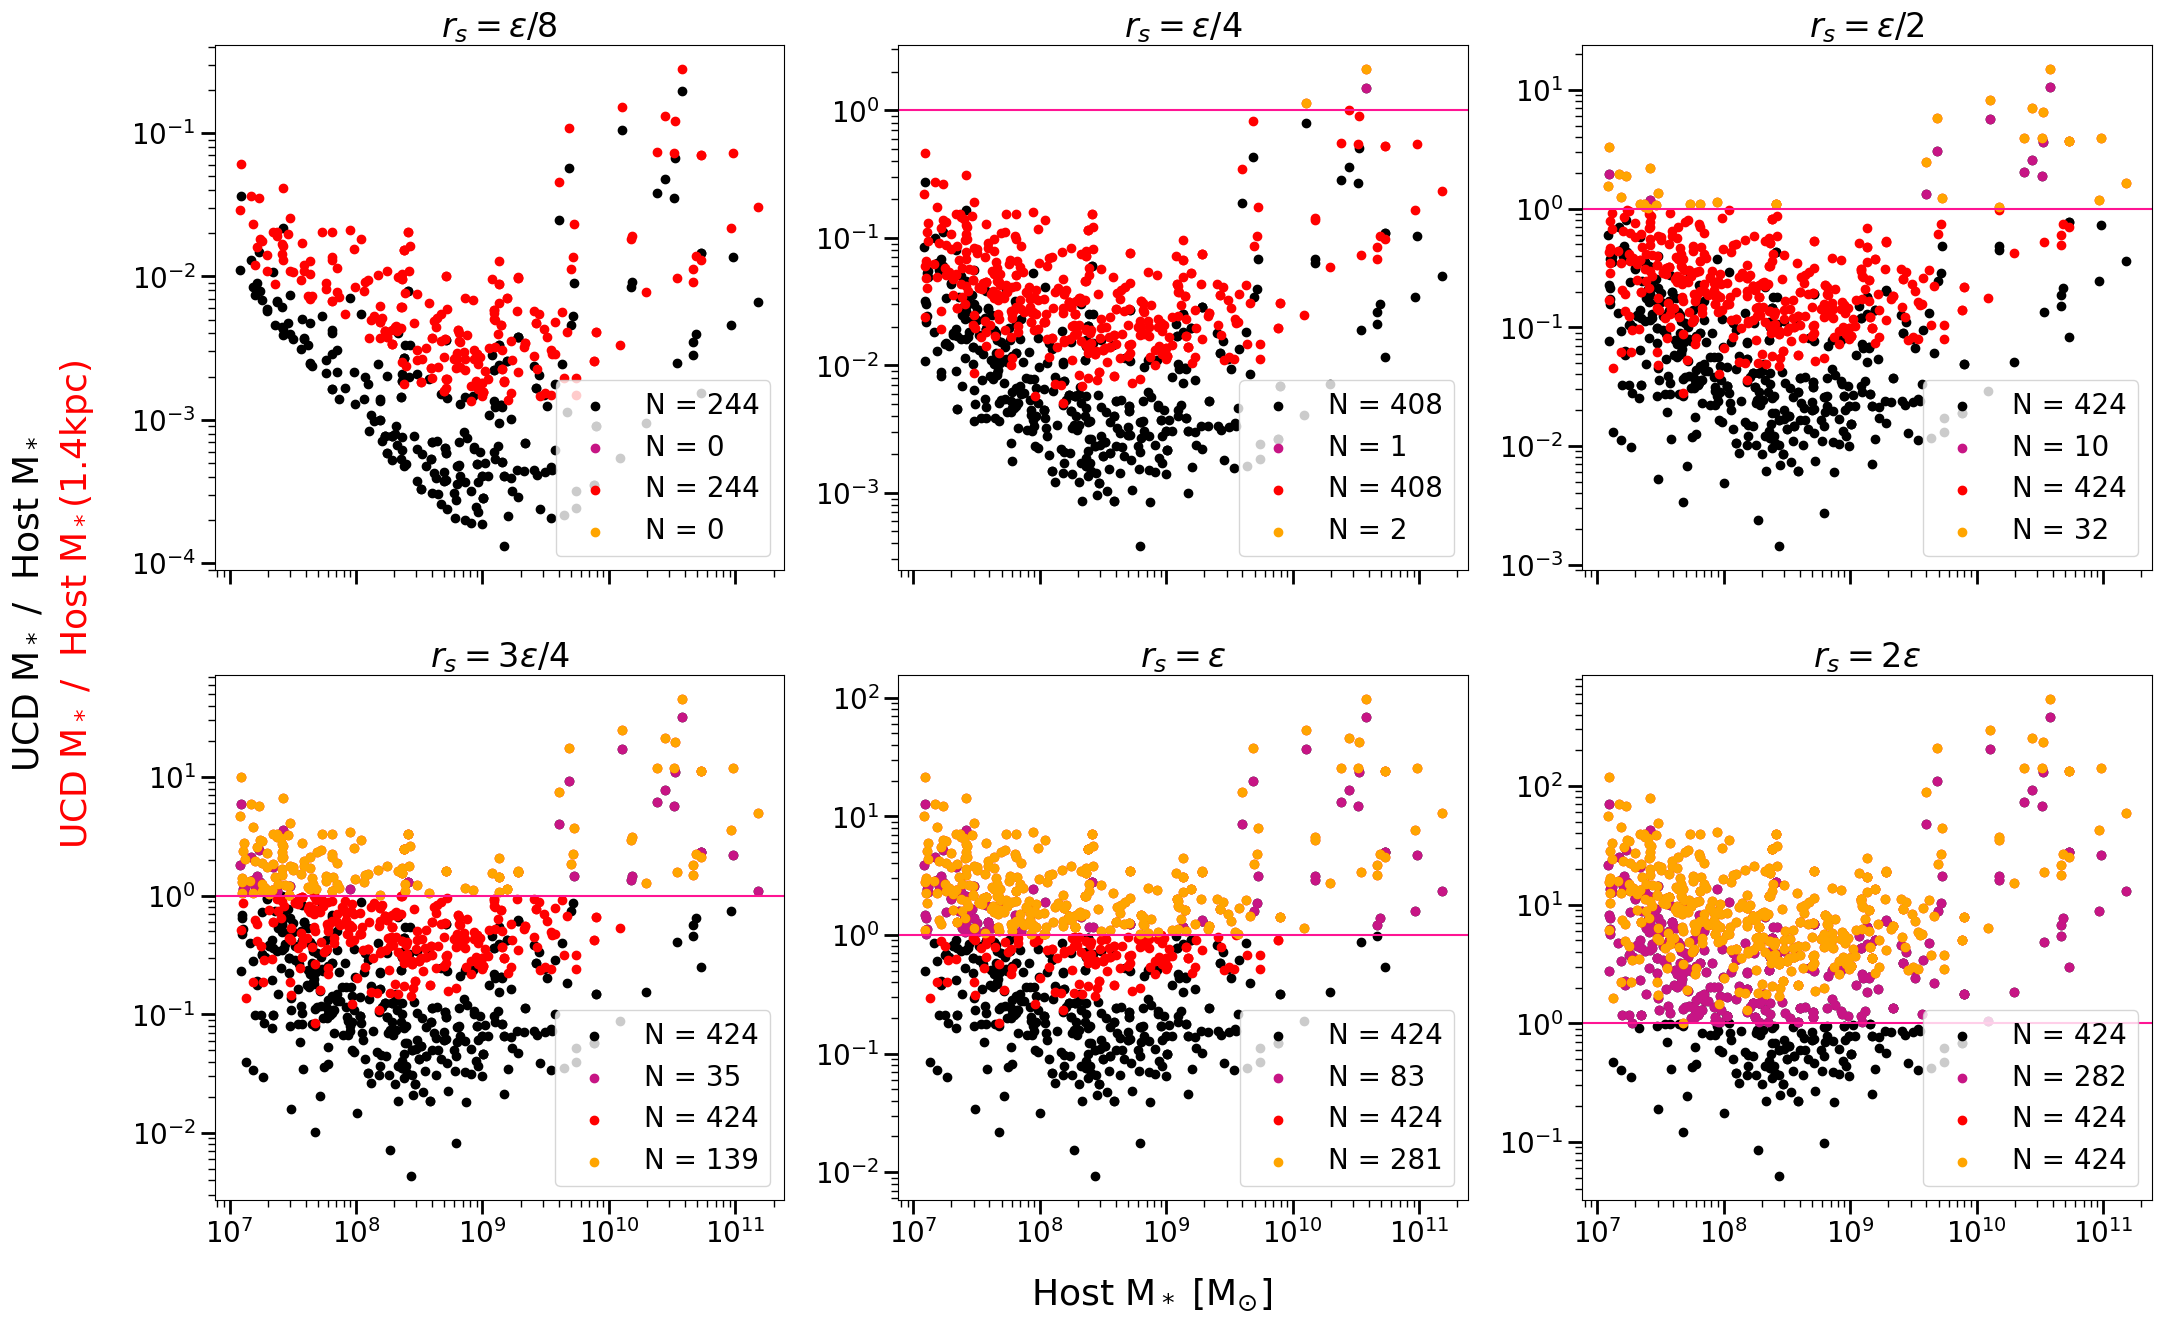

In [13]:
f = open('UCD_initial_rs0.pkl','rb')
data = pck.load(f)
f.close()
mass = np.array(data['mass'])
host_m = np.array(data['host_mass'])
host_at = np.array(data['host_at'])

f = open('UCD_initial_rs1.pkl','rb')
data1 = pck.load(f)
f.close()
mass1 = np.array(data1['mass'])
host_m1 = np.array(data1['host_mass'])
host_at1 = np.array(data1['host_at'])

f = open('UCD_initial_rs2.pkl','rb')
data2 = pck.load(f)
f.close()
mass2 = np.array(data2['mass'])
host_m2 = np.array(data2['host_mass'])
host_at2 = np.array(data2['host_at'])

f = open('UCD_initial_rs3.pkl','rb')
data3 = pck.load(f)
f.close()
mass3 = np.array(data3['mass'])
host_m3 = np.array(data3['host_mass'])
host_at3 = np.array(data3['host_at'])

f = open('UCD_initial_rs4.pkl','rb')
data4 = pck.load(f)
f.close()
mass4 = np.array(data4['mass'])
host_m4 = np.array(data4['host_mass'])
host_at4 = np.array(data4['host_at'])

f = open('UCD_initial_rs5.pkl','rb')
data5 = pck.load(f)
f.close()
mass5 = np.array(data5['mass'])
host_m5 = np.array(data5['host_mass'])
host_at5 = np.array(data5['host_at'])

fig, (ax) = plt.subplots(2,3,figsize=(25,15),sharex='all')
plt.xscale('log')
plt.yscale('log')
ax[0,1].axhline(y=1,c = 'deeppink')
ax[0,2].axhline(y=1,c = 'deeppink')
ax[1,0].axhline(y=1,c = 'deeppink')
ax[1,1].axhline(y=1,c = 'deeppink')
ax[1,2].axhline(y=1,c = 'deeppink')
ax[0,0].scatter(host_m,mass/host_m,c='k',label='N = '+str(len(host_m)))
ax[0,1].scatter(host_m1,mass1/host_m1,c='k',label='N = '+str(len(host_m1)))
ax[0,2].scatter(host_m2,mass2/host_m2,c='k',label='N = '+str(len(host_m2)))
ax[1,0].scatter(host_m3,mass3/host_m3,c='k',label='N = '+str(len(host_m3)))
ax[1,1].scatter(host_m4,mass4/host_m4,c='k',label='N = '+str(len(host_m4)))
ax[1,2].scatter(host_m5,mass5/host_m5,c='k',label='N = '+str(len(host_m5)))
bad = np.where((mass/host_m)>1)
bad1 = np.where((mass1/host_m1)>1)
bad2 = np.where((mass2/host_m2)>1)
bad3 = np.where((mass3/host_m3)>1)
bad4 = np.where((mass4/host_m4)>1)
bad5 = np.where((mass5/host_m5)>1)
ax[0,0].scatter(host_m[bad],mass[bad]/host_m[bad],c='mediumvioletred',label='N = '+str(len(host_m[bad])))
ax[0,1].scatter(host_m1[bad1],mass1[bad1]/host_m1[bad1],c='mediumvioletred',label='N = '+str(len(host_m1[bad1])))
ax[0,2].scatter(host_m2[bad2],mass2[bad2]/host_m2[bad2],c='mediumvioletred',label='N = '+str(len(host_m2[bad2])))
ax[1,0].scatter(host_m3[bad3],mass3[bad3]/host_m3[bad3],c='mediumvioletred',label='N = '+str(len(host_m3[bad3])))
ax[1,1].scatter(host_m4[bad4],mass4[bad4]/host_m4[bad4],c='mediumvioletred',label='N = '+str(len(host_m4[bad4])))
ax[1,2].scatter(host_m5[bad5],mass5[bad5]/host_m5[bad5],c='mediumvioletred',label='N = '+str(len(host_m5[bad5])))
ax[0,0].set_title('$r_s = \epsilon/8$')
ax[0,1].set_title('$r_s = \epsilon/4$')
ax[0,2].set_title('$r_s = \epsilon/2$')
ax[1,0].set_title('$r_s = 3\epsilon/4$')
ax[1,1].set_title('$r_s = \epsilon$')
ax[1,2].set_title('$r_s = 2\epsilon$')

ax[0,0].scatter(host_m,mass/host_at,c='r',label='N = '+str(len(host_m)))
ax[0,1].scatter(host_m1,mass1/host_at1,c='r',label='N = '+str(len(host_m1)))
ax[0,2].scatter(host_m2,mass2/host_at2,c='r',label='N = '+str(len(host_m2)))
ax[1,0].scatter(host_m3,mass3/host_at3,c='r',label='N = '+str(len(host_m3)))
ax[1,1].scatter(host_m4,mass4/host_at4,c='r',label='N = '+str(len(host_m4)))
ax[1,2].scatter(host_m5,mass5/host_at5,c='r',label='N = '+str(len(host_m5)))
bad = np.where((mass/host_at)>1)
bad1 = np.where((mass1/host_at1)>1)
bad2 = np.where((mass2/host_at2)>1)
bad3 = np.where((mass3/host_at3)>1)
bad4 = np.where((mass4/host_at4)>1)
bad5 = np.where((mass5/host_at5)>1)
ax[0,0].scatter(host_m[bad],mass[bad]/host_at[bad],c='orange',label='N = '+str(len(host_m[bad])))
ax[0,1].scatter(host_m1[bad1],mass1[bad1]/host_at1[bad1],c='orange',label='N = '+str(len(host_m1[bad1])))
ax[0,2].scatter(host_m2[bad2],mass2[bad2]/host_at2[bad2],c='orange',label='N = '+str(len(host_m2[bad2])))
ax[1,0].scatter(host_m3[bad3],mass3[bad3]/host_at3[bad3],c='orange',label='N = '+str(len(host_m3[bad3])))
ax[1,1].scatter(host_m4[bad4],mass4[bad4]/host_at4[bad4],c='orange',label='N = '+str(len(host_m4[bad4])))
ax[1,2].scatter(host_m5[bad5],mass5[bad5]/host_at5[bad5],c='orange',label='N = '+str(len(host_m5[bad5])))
ax[0,0].set_title('$r_s = \epsilon/8$')
ax[0,1].set_title('$r_s = \epsilon/4$')
ax[0,2].set_title('$r_s = \epsilon/2$')
ax[1,0].set_title('$r_s = 3\epsilon/4$')
ax[1,1].set_title('$r_s = \epsilon$')
ax[1,2].set_title('$r_s = 2\epsilon$')
ax[0,1].set_yscale('log')
ax[0,2].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,2].set_yscale('log')
ax[0,0].set_yscale('log')
ax[0,0].legend(loc='lower right')
ax[0,1].legend(loc='lower right')
ax[0,2].legend(loc='lower right')
ax[1,0].legend(loc='lower right')
ax[1,1].legend(loc='lower right')
ax[1,2].legend(loc='lower right')
fig.text(0.5,0.04,'Host M$_*$ [M$_{\odot}$]',fontsize=26,ha='center')
fig.text(0.05,0.4,'UCD M$_*$ /  Host M$_*$',fontsize=26,ha='center',rotation='vertical')
fig.text(0.07,0.35,'UCD M$_*$ /  Host M$_*$(1.4kpc)',fontsize=26,ha='center',rotation = 'vertical',c='r')
plt.savefig('mass_check.png')

In [8]:
def BHMBulge(logMbulge):
    '''
    BH mass given a bulge mass
    based on analysis by Haring and Rix 2004 and Kormendy and Ho 2013
    '''
    c = 8.69
    a = 1.16
    b = 11.
    predlogMBH = c + a * (logMbulge-b)
    return predlogMBH

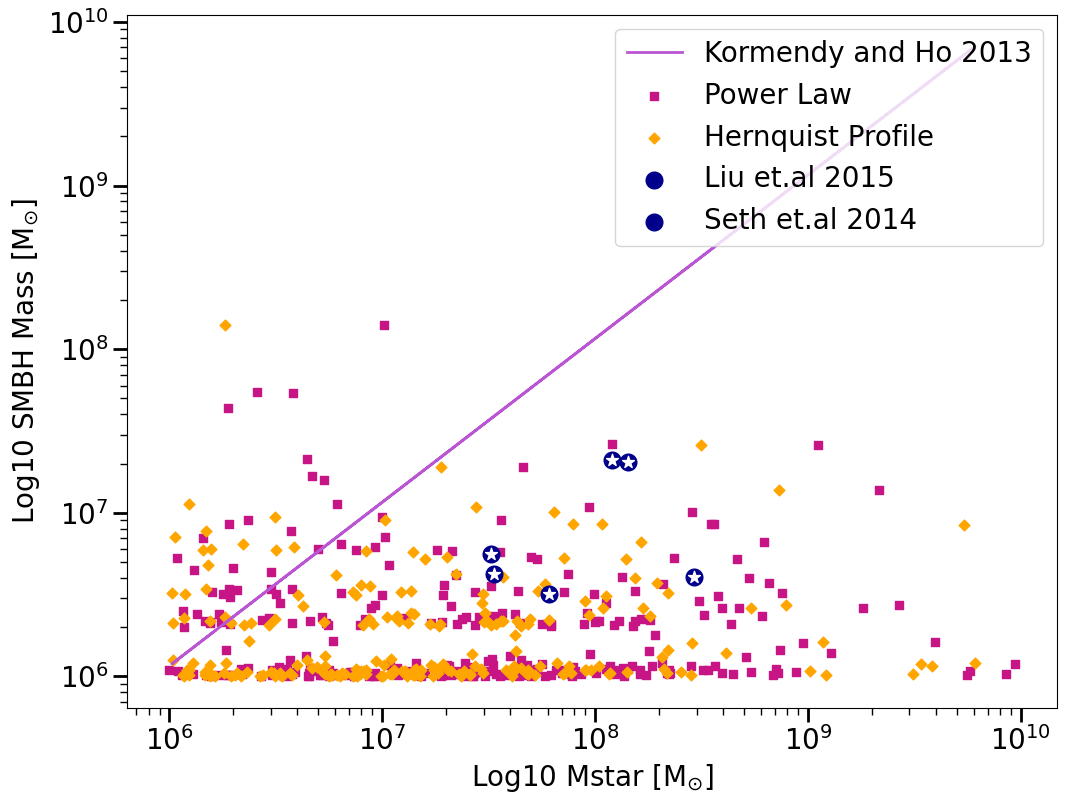

In [42]:
f = open('UCDs_powerlaw.pkl','rb')
data = pck.load(f)
f.close()

f = open('UCD_rs3.pkl','rb')
data3 = pck.load(f)
f.close()

mass3 = np.array(data3['mass'])
host_m3 = np.array(data3['host_mass'])
host_at3 = np.array(data3['host_at'])
bh_mass3 = np.array(data3['bh_mass'])

UCD_bh_mass = np.array(data['bh_mass'])
UCD_mass=np.array(data['mass'])
UCD_host_mass = np.array(data['host_mass'])
UCD_dist = np.array(data['dist'])
UCD_infall = np.array(data['infall'])
UCD_proxy = np.array(data['proxy'])
UCD_ids = np.array(data['ids'])
UCD_index = np.array(data['index'])

bad = np.where(UCD_mass<10000000000)
bad1 = np.where((mass3<10000000000)&(mass3>1000000))

Mbh_bulge = []
mbulge = mass3[bad1]
for i in range(len(mass3[bad1])):
    mbh = BHMBulge(mbulge[i])
    Mbh_bulge.append(mbh)
    
plt.plot(mbulge,Mbh_bulge,label='Kormendy and Ho 2013',c='mediumorchid',lw=2)
#plt.scatter(UCD_mass,UCD_bh_mass,c = (UCD_infall),cmap = 'plasma',marker='o')
#plt.scatter(UCD_proxy,UCD_bh_mass,c = (UCD_infall),cmap = 'binary',marker='p')
plt.scatter(UCD_mass[bad],UCD_bh_mass[bad],30,marker='s',c='mediumvioletred',label='Power Law')
plt.scatter(mass3[bad1],bh_mass3[bad1],30,marker='D',c='orange',label='Hernquist Profile')
plt.yscale('log')
plt.xscale('log')
#plt.colorbar(label='Time nearest infall [Gyr]')
plt.ylabel('Log10 SMBH Mass [M$_{\odot}$]')
plt.xlabel('Log10 Mstar [M$_{\odot}$]')
x = [142771855.50051567, 292886385.26811767, 60638233.54077626,32337005.82649589, 33618003.856203355]#, 19982490.252430223]
y = [20344817.370523263, 4038716.314133705, 3200198.552519341, 5572758.119793392, 4258338.690282161]#, 47989.085148563696]
plt.scatter(x,y,label='Liu et.al 2015 ',marker='o',linewidths=7, c = 'darkblue')
plt.scatter(x,y,80,marker='*', c = 'white')
x1 = 1.2*10**(8)
y1 = 2.1*10**(7)
plt.scatter(x1,y1,c='darkblue',label='Seth et.al 2014 ',marker='o',linewidths=7)
plt.scatter(x1,y1,80,c='white',marker='*')
plt.legend(loc='upper right')

In [6]:
def BHMstar(logMstar):
    '''
    BH mass given a stellar mass
    based on analysis by Haring and Rix 2004 and Schramm + Silverman 2013
    '''
    c = 8.31
    a = 1.12
    b = 11.
    predlogMBH = c + a * (logMstar-b)
    return predlogMBH

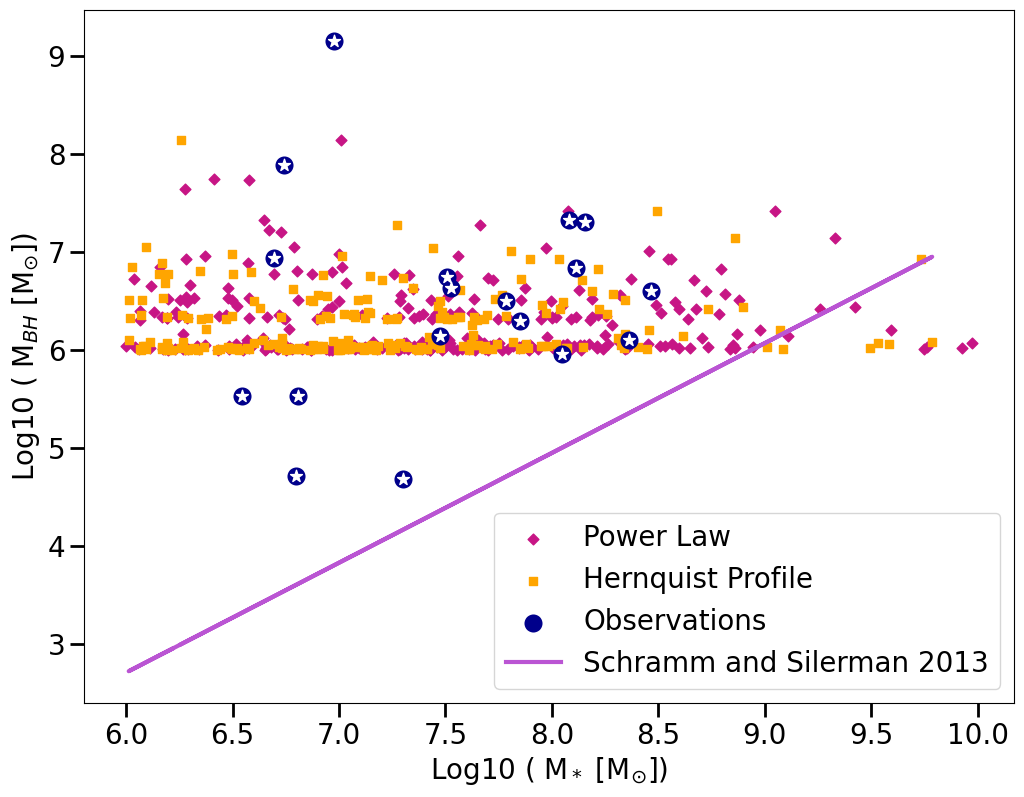

In [12]:
f = open('UCDs_powerlaw.pkl','rb')
data = pck.load(f)
f.close()

f = open('UCD_rs3.pkl','rb')
data3 = pck.load(f)
f.close()

mass3 = np.log10(np.array(data3['mass']))
bh_mass3 = np.log10(np.array(data3['bh_mass']))
infall = data3['infall']
host_mass = data3['host_mass']
ids= data3['ids']
index = np.array(data3['index'])
dist = np.array(data3['dist'])

UCD_bh_mass = np.log10(np.array(data['bh_mass']))
UCD_mass=np.log10(np.array(data['mass']))
UCD_host_mass = (np.array(data['host_mass']))
UCD_dist = np.log10(np.array(data['dist']))
UCD_infall = (np.array(data['infall']))
UCD_proxy = np.log10(np.array(data['proxy']))
UCD_ids = np.log10(np.array(data['ids']))
UCD_index = np.log10(np.array(data['index']))

bad = np.where(UCD_mass<10)
bad1 = np.where((mass3<10)&(mass3>6))

Mbh_bulge = []
mbulge = (mass3[bad1])
for i in range(len(mass3[bad1])):
    mbh = BHMstar(mbulge[i])
    Mbh_bulge.append(mbh)
    
#plt.scatter(UCD_mass,UCD_bh_mass,c = (UCD_infall),cmap = 'plasma',marker='o')
#plt.scatter(UCD_proxy,UCD_bh_mass,c = (UCD_infall),cmap = 'binary',marker='p')
plt.scatter(UCD_mass[bad],UCD_bh_mass[bad],30,marker='D',c='mediumvioletred',label='Power Law')
plt.scatter(mass3[bad1],bh_mass3[bad1],30,marker='s',c='orange',label='Hernquist Profile')
#plt.plot(mass3[bad1],p(mass3[bad1]),'k--')
#plt.plot(UCD_mass[bad],p1(UCD_mass[bad]),'k--')
y2 = [6.292381138424715,6.835212363437307,5.962878716756724,6.100123796474598,6.138099484732626,4.710158805289247,5.534937019541938,5.534937019541938,6.934912499179467,9.1501856947119,7.883940224142607]
x2 = [7.849121815352425,8.115077974119155,8.046036961861759,8.361420319567578,7.476016107809942,6.799574695779213,6.805386831738989,6.543102396030347,6.695800973023566, 6.976117236560004,6.741725649668559]
plt.scatter(x2,y2,marker='o',linewidths=7, c = 'darkblue')
plt.scatter(x2,y2,80,marker='*', c = 'white')
#plt.yscale('log')
#plt.xscale('log')
#plt.colorbar(label='Time nearest infall [Gyr]')
plt.ylabel('Log10 ( M$_{BH}$ [M$_{\odot}$])')
plt.xlabel('Log10 ( M$_*$ [M$_{\odot}$])')
x = [142771855.50051567, 292886385.26811767,32337005.82649589 , 19982490.252430223,60638233.54077626,33618003.856203355]
y = [20344817.370523263, 4038716.314133705, 5572758.119793392 , 47989.085148563696,3200198.552519341,4258338.690282161]

#plt.scatter(np.log10(n),np.log10(m),marker='o',linewidths=7, c = 'red',label = 'Observed')
#plt.scatter(np.log10(n),np.log10(m),80,marker='*', c = 'white')
#plt.scatter(np.log10(x),np.log10(y),c='orange',label='Liu et.al 2015 ',marker='p',linewidths=5)
plt.scatter(np.log10(x),np.log10(y),marker='o',linewidths=7, c = 'darkblue')
plt.scatter(np.log10(x),np.log10(y),80,marker='*', c = 'white')
x1 = np.log10(1.2*10**(8))
y1 = np.log10(2.1*10**(7))
plt.scatter(x1,y1,marker='o',linewidths=7, c = 'darkblue',label='Observations')
plt.scatter(x1,y1,80,marker='*', c = 'white')
#plt.scatter(x1,y1,c='yellow',label='Seth et.al 2014 ',marker='p',linewidths=5)
plt.plot(mbulge,Mbh_bulge,c='mediumorchid',lw=3,label='Schramm and Silerman 2013')
c = 7.569711980768444
b = 6.607599171333968
#plt.scatter(c,b, c='r',lw=8,label = 'Simulated')
#plt.ylim(6.4,6.8)
plt.legend(loc='lower right')
plt.savefig('UCDmass_BHmass.png')

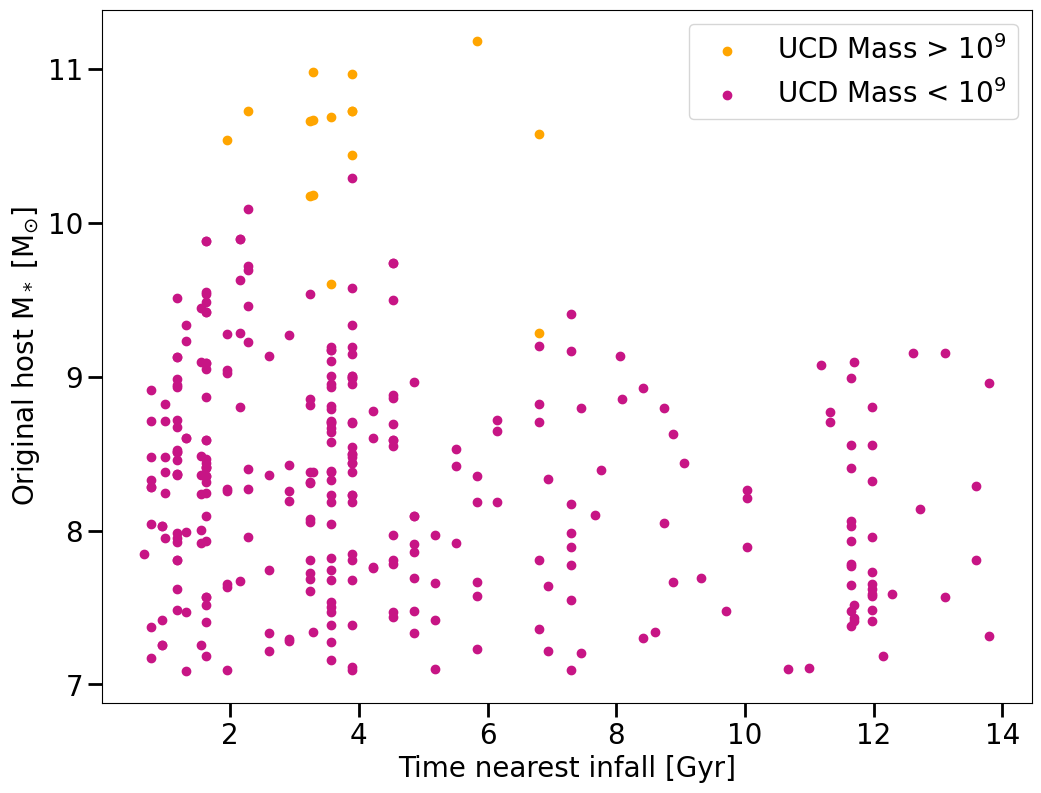

In [95]:
m1 = np.where((mass3 > 9))
m2 = np.where((mass3 < 9))
z = np.where((infall[m1])<10)
z1 = infall[m1]
z2=host_mass[m1]
plt.scatter(z1[z],np.log10(z2[z]),c='orange', label = 'UCD Mass > 10$^9$')
plt.scatter(infall[m2],np.log10(host_mass[m2]),c='mediumvioletred',label = 'UCD Mass < 10$^9$')
plt.xlabel('Time nearest infall [Gyr]')
plt.ylabel('Original host M$_*$ [M$_{\odot}$]')
plt.legend(loc='upper right')
plt.savefig('host_infall.png')
#plt.ylabel('M$_*$ ')


In [1]:
x,n = np.histogram(z1[z],bins=1000)
x1,n1  = np.histogram(infall[m2],bins=1000)
y = np.cumsum(x)
y1= np.cumsum(x1)
plt.plot(n[1:],y/len(z1[z]),label='UCD Mass > 10$^9$',c='orange')
plt.plot(n1[1:],y1/len(infall[m2]),label = 'UCD Mass < 10$^9$',c='mediumvioletred')
plt.xlabel('Time nearest infall [Gyr]')
plt.ylabel('Cumulative Distribution')
plt.legend(loc='lower right')
plt.savefig('dist_time.png')

NameError: name 'np' is not defined

In [45]:
z = host_mass[bad1]
s = infall[bad1]
i = ids[bad1]
ind=index[bad1]
d = dist[bad1]
print(z[29],s[29],i[29],ind[29],d[29])
print(s[29]-14)

1222533025.0010998 1.627593993470575 570127988 156 56.17306524046165
-12.372406006529426


In [30]:
y = bh_mass3[bad1]
x = mass3[bad1]
print(np.log10(n),np.log10(m),'\n')
for i in range(len(x)):
    print(i,x[i],y[i])
print(x[29],y[29])

7.526571922667612 6.629240200425683 

0 6.259942296301896 8.145176669614804
1 8.49573907469547 7.417470366311383
2 7.27440873913864 7.277581809120049
3 8.862235949329682 7.141481561038349
4 6.094953053212499 7.052417687800272
5 7.441826834593216 7.038221739059687
6 7.80901301419211 7.006592475381826
7 6.49574830036177 6.974675640931792
8 7.01256294607479 6.956483902746527
9 8.034549817455117 6.930913971238137
10 7.896490053283129 6.929554124248497
11 9.73259100667722 6.924028081871763
12 6.170563520630151 6.8875535748801955
13 6.0286342703316915 6.850797210980796
14 8.21625800404119 6.822733827673762
15 6.345803571804592 6.808015127427109
16 6.58814721435108 6.79323352107045
17 6.195596849545873 6.778219321150418
18 6.1569053094486454 6.775475103083277
19 6.500703651308447 6.773300288318612
20 6.92334101291419 6.7697542812429115
21 7.145075855242652 6.75976027368762
22 7.302533964820471 6.733079285885766
23 7.855875889020967 6.7256318031124795
24 8.143402809077934 6.716041086147318
25 

In [2]:
halo = db.get_halo('h1.cosmo50/%4096/'+str(1))
x= np.arange(0,2193,1)
M = []
D = []
for i in range(2193):
    bh = halo['BH_central'][x[i]]
    mass = bh['BH_mass']
    dist = bh['BH_central_distance']
    M.append(mass)
    D.append(dist)


In [39]:
data_to_file = {'mass':M,'dist':D}
f = open('wanderers.pkl','wb')
pck.dump(data_to_file,f)
f.close()

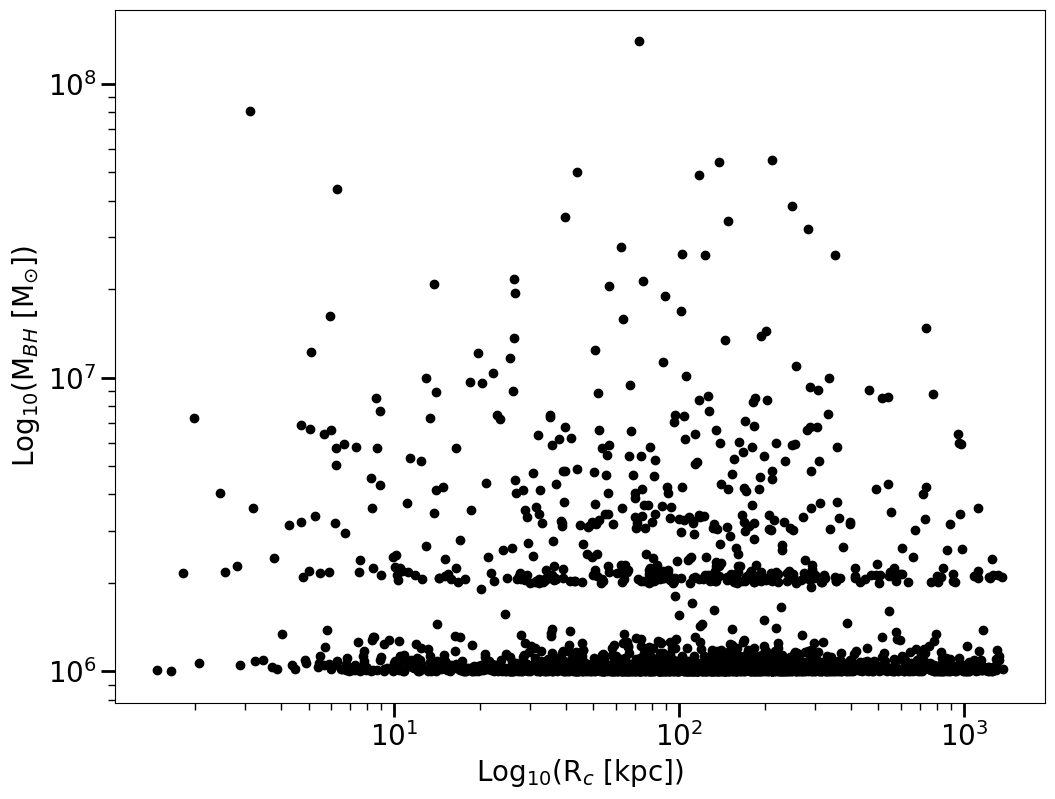

In [9]:
D = np.array(D)
M = np.array(M)
ok=np.where(D>1)
plt.scatter(D[ok],M[ok],c='k')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Log$_{10}$(R$_c$ [kpc])')
plt.ylabel('Log$_{10}$(M$_{BH}$ [M$_{\odot}$])')
plt.savefig('wanderer_pop.png')

In [17]:
bh = halo['BH_central'][0]
time = bh.calculate_for_progenitors('t()')
print((time[0]))
diff = []
for i in range(len(time[0])-1):
    diff.append(time[0][i]-time[0][i+1])
print(diff)
print(sum(diff)/71)

[13.8007975  13.58534257 13.26216017 13.25879369 13.10730194 12.93897778
 12.72352285 12.61579539 12.45757067 12.29261299 12.20171794 12.1512207
 11.9694306  11.69001249 11.64624821 11.32306581 11.18840648 10.99988342
 10.76759607 10.70363289 10.67670102 10.35351863 10.22895875 10.03033624
  9.76775054  9.70715384  9.38397145  9.32000827  9.06078905  8.88573192
  8.73760666  8.6096803   8.468288    8.41442427  8.09124187  8.06094352
  7.76805948  7.67043146  7.44487708  7.29675182  7.12169469  7.03753261
  6.93317163  6.7985123   6.15214751  5.86936291  5.82896511  5.50578272
  5.18260033  4.85941793  4.53623554  4.21305314  3.88987075  3.56668836
  3.29063673  3.24350596  2.92032357  2.59714118  2.27395878  2.15276538
  1.95077639  1.62759399  1.54679839  1.3044116   1.17648524  0.98122921
  0.93409844  0.76577428  0.65804681  0.6412144   0.47625672  0.33486442]
[0.2154549292861283, 0.3231823939289793, 0.003366483270115239, 0.15149174715504898, 0.16832416350558965, 0.21545492928712484

In [20]:
halo['Mstar']

3837013694694.172

In [23]:
halo = db.get_halo('h1.cosmo50/%4096/'+str(2))

In [24]:
halo['Mstar']

499869851114.2206

None
423


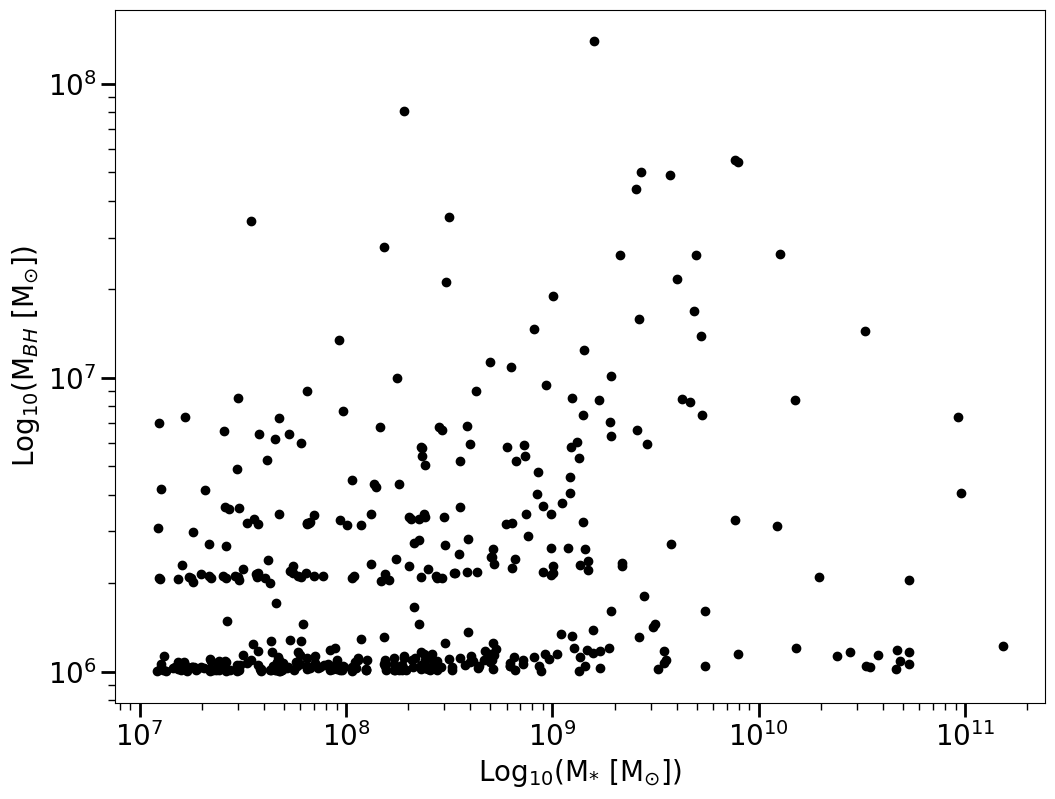

In [5]:
f = open('Extrapolation_Outputs.pkl','rb')
data = pck.load(f)
f.close()
bh1 = (np.array(data['bhmass']))
stellar1 = (np.array(data['hostmass']))
ok = np.where(bh1<10000000000)
stellar2 = (stellar1[ok])
bh2= (bh1[ok])
n = np.where(stellar2>100000000)
news = np.log10(stellar2[n]*0.6).tolist()
nbh = np.log10(bh2[n]).tolist()
s = np.where(stellar2<100000000)
sm = np.log10(stellar2[s]).tolist()
sbh = np.log10(bh2[s]).tolist()

stellar = sm.extend(news)
print(stellar)
bh=sbh.extend(nbh)
predbh = []
for i in range(len(stellar2)):
    mbh = BHMstar(stellar2[i])
    predbh.append(mbh)
plt.scatter(stellar2,bh2,c='k')
#plt.plot(stellar2,predbh,label='Schramm and Silerman 2013',c='mediumvioletred',lw=3)
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Log$_{10}$(M$_{BH}$ [M$_{\odot}$])')
plt.xlabel('Log$_{10}$(M$_{*}$ [M$_{\odot}$])')
#plt.legend(loc='lower right')
plt.savefig('bh_host.png')
print(len(stellar2))

In [6]:
424/2193

0.19334245326037391